In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [73]:
#ally_direct = pd.read_csv("./alliances/alliance_v4.1_by_directed.csv")
#ally_direct_year = pd.read_csv("/alliances/alliance_v4.1_by_directed_yearly.csv")
#ally_dyad = pd.read_csv("./alliances/alliance_v4.1_by_dyad.csv")
ally_dyad_year = pd.read_csv("./alliances/alliance_v4.1_by_dyad_yearly.csv")
#ally_member = pd.read_csv("/alliances/alliance_v4.1_by_member.csv")
#ally_member_year = pd.read_csv("/alliances/alliance_v4.1_by_member_yearly.csv")

In [74]:
ally_dyad_year.info()
ally_dyad_year.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74129 entries, 0 to 74128
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   version4id      74129 non-null  int64  
 1   ccode1          74129 non-null  int64  
 2   state_name1     74129 non-null  object 
 3   ccode2          74129 non-null  int64  
 4   state_name2     74129 non-null  object 
 5   dyad_st_day     74129 non-null  int64  
 6   dyad_st_month   74129 non-null  int64  
 7   dyad_st_year    74129 non-null  int64  
 8   dyad_end_day    16354 non-null  float64
 9   dyad_end_month  16354 non-null  float64
 10  dyad_end_year   74129 non-null  int64  
 11  left_censor     74129 non-null  int64  
 12  right_censor    74129 non-null  int64  
 13  defense         74129 non-null  int64  
 14  neutrality      74129 non-null  int64  
 15  nonaggression   74108 non-null  float64
 16  entente         74117 non-null  float64
 17  year            74129 non-null 

,version4id,ccode1,state_name1,ccode2,state_name2,dyad_st_day,dyad_st_month,dyad_st_year,dyad_end_day,dyad_end_month,dyad_end_year,left_censor,right_censor,defense,neutrality,nonaggression,entente,year,version
0,1,200,United Kingdom,235,Portugal,1,1,1816,NaN,NaN,2012,1,1,1,0,1.0,0.0,1816,4.1
1,1,200,United Kingdom,235,Portugal,1,1,1816,NaN,NaN,2012,1,1,1,0,1.0,0.0,1817,4.1
2,1,200,United Kingdom,235,Portugal,1,1,1816,NaN,NaN,2012,1,1,1,0,1.0,0.0,1818,4.1
3,1,200,United Kingdom,235,Portugal,1,1,1816,NaN,NaN,2012,1,1,1,0,1.0,0.0,1819,4.1
4,1,200,United Kingdom,235,Portugal,1,1,1816,NaN,NaN,2012,1,1,1,0,1.0,0.0,1820,4.1


In [75]:
ally_dyad_year.tail()

,version4id,ccode1,state_name1,ccode2,state_name2,dyad_st_day,dyad_st_month,dyad_st_year,dyad_end_day,dyad_end_month,dyad_end_year,left_censor,right_censor,defense,neutrality,nonaggression,entente,year,version
74124,414,2,United States of America,666,Israel,30,11,1987,26.0,12.0,1991,0,0,0,0,0.0,1.0,0,4.1
74125,414,2,United States of America,666,Israel,30,11,1988,26.0,12.0,1991,0,0,0,0,0.0,1.0,0,4.1
74126,414,2,United States of America,666,Israel,30,11,1989,26.0,12.0,1991,0,0,0,0,0.0,1.0,0,4.1
74127,414,2,United States of America,666,Israel,30,11,1990,26.0,12.0,1991,0,0,0,0,0.0,1.0,0,4.1
74128,414,2,United States of America,666,Israel,30,11,1991,26.0,12.0,1991,0,0,0,0,0.0,1.0,0,4.1


In [76]:
ally_dyad_year.isnull().sum()

version4id            0
ccode1                0
state_name1           0
ccode2                0
state_name2           0
dyad_st_day           0
dyad_st_month         0
dyad_st_year          0
dyad_end_day      57775
dyad_end_month    57775
dyad_end_year         0
left_censor           0
right_censor          0
defense               0
neutrality            0
nonaggression        21
entente              12
year                  0
version               0
dtype: int64

In [77]:
year = 2012
year_specific_df = ally_dyad_year[ally_dyad_year['year']==year]
print("There are", pd.concat((year_specific_df['ccode1'],year_specific_df['ccode2'])).nunique(),"states in the year",year,"that have",year_specific_df['version4id'].nunique(),"alliances between themselves.")

There are 142 states in the year 2012 that have 97 alliances between themselves.


In [78]:
# We can find all the alliances of a particular country in a particular year

# For example the UK in the year 2005
ccode = 200
year = 2012
country_year = ally_dyad_year[(ally_dyad_year['ccode1'] == ccode) & (ally_dyad_year['year'] == year)]

# Display the filtered DataFrame
#print(country_year)
print('Number of ', ally_dyad_year[ally_dyad_year['ccode1'] == ccode]['state_name1'].values[0], ' alliances in ', year, ': ', len(country_year))


Number of  United Kingdom  alliances in  2012 :  26


In [79]:
# Finding each country's alliance per year

# Reading in COW country codes
file_path = './alliances/COW-country-codes.csv'
# For some reason the COW codes have duplicates
ccodes_df = pd.read_csv(file_path).drop_duplicates()

# Looping through each country and storing their number of alliances
new_entries = []
defense = 0
neutrality = 0
nonaggression = 0
entente = 0

for year in range (2000, 2013):
    for index, row in ccodes_df.iterrows():
        # Filtered dataframe for that country and year
        filtered_df = ally_dyad_year[(ally_dyad_year['ccode1'] == row['CCode']) &(ally_dyad_year['year'] == year)]

        defense = filtered_df['defense'].sum()
        neutrality = filtered_df['neutrality'].sum()
        nonaggression = filtered_df['nonaggression'].sum()
        entente = filtered_df['entente'].sum()

        new_entries.append({'ccode':row['CCode'], 'name':row['StateNme'], 'year':year, 'defense': defense, 'neutrality': neutrality, 'nonaggression': nonaggression, 'entente':entente, 'total':defense+neutrality+nonaggression+entente, 'score': (defense*4)+(neutrality*3)+(nonaggression*2)+entente})

member_year = pd.DataFrame()
member_year = pd.concat([member_year, pd.DataFrame(new_entries)], ignore_index=True)

In [80]:
member_year.info()
member_year.head(28)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2821 entries, 0 to 2820
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ccode          2821 non-null   int64  
 1   name           2821 non-null   object 
 2   year           2821 non-null   int64  
 3   defense        2821 non-null   int64  
 4   neutrality     2821 non-null   int64  
 5   nonaggression  2821 non-null   float64
 6   entente        2821 non-null   float64
 7   total          2821 non-null   float64
 8   score          2821 non-null   float64
dtypes: float64(4), int64(4), object(1)
memory usage: 198.5+ KB


,ccode,name,year,defense,neutrality,nonaggression,entente,total,score
0,2,United States of America,2000,58,0,52.0,54.0,164.0,390.0
1,20,Canada,2000,49,1,50.0,49.0,149.0,348.0
2,31,Bahamas,2000,31,0,31.0,31.0,93.0,217.0
3,40,Cuba,2000,0,0,0.0,0.0,0.0,0.0
4,41,Haiti,2000,30,0,30.0,30.0,90.0,210.0
5,42,Dominican Republic,2000,29,0,29.0,29.0,87.0,203.0
6,51,Jamaica,2000,28,0,28.0,28.0,84.0,196.0
7,52,Trinidad and Tobago,2000,27,0,0.0,27.0,54.0,135.0
8,53,Barbados,2000,32,0,26.0,26.0,84.0,206.0
9,54,Dominica,2000,34,0,25.0,25.0,84.0,211.0


In [81]:
# Specific year and all countries alliances
year_2012 = member_year[member_year['year'] == 2012]
year_2012.head()

,ccode,name,year,defense,neutrality,nonaggression,entente,total,score
2604,2,United States of America,2012,58,0,52.0,54.0,164.0,390.0
2605,20,Canada,2012,49,1,50.0,49.0,149.0,348.0
2606,31,Bahamas,2012,31,0,31.0,31.0,93.0,217.0
2607,40,Cuba,2012,0,0,0.0,0.0,0.0,0.0
2608,41,Haiti,2012,30,0,30.0,30.0,90.0,210.0


In [82]:
# Highest score
index_of_max_score = year_2012['score'].idxmax()
row_with_max_score = year_2012.loc[index_of_max_score]
print(row_with_max_score['name'], 'has the highest score of: ', int(row_with_max_score['score']))

# Lowest score
index_of_min_score = year_2012['score'].idxmin()
row_with_min_score = year_2012.loc[index_of_min_score]
print(row_with_min_score['name'], 'has the lowest score of: ', int(row_with_min_score['score']))

print()

# Most treaties
index_of_max_treaty= year_2012['total'].idxmax()
row_with_max_treaty= year_2012.loc[index_of_max_treaty]
print(row_with_max_treaty['name'], 'has the most alliances at: ', int(row_with_max_treaty['total']))

# Least treaties
index_of_min_treaty = year_2012['total'].idxmin()
row_with_min_treaty = year_2012.loc[index_of_min_score]
print(row_with_min_treaty['name'], 'has the least alliances: ', int(row_with_min_treaty['total']))

United States of America has the highest score of:  390
Cuba has the lowest score of:  0

United States of America has the most alliances at:  164
Cuba has the least alliances:  0


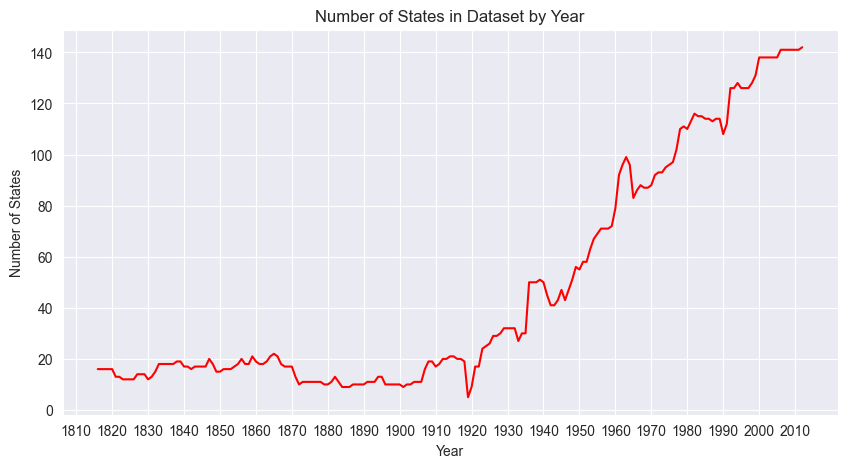

Stats for amount of states in dataset each year
Mean: 47.390862944162436
Median: 20.0
Mode: 10


In [83]:
states_year_count = {}
for year in range(1816,2013):
    states_year_count[year] = pd.concat([(ally_dyad_year[ally_dyad_year['year'] == year])['ccode1'],(ally_dyad_year[ally_dyad_year['year'] == year])['ccode2']]).nunique()

states_year_count_df = pd.DataFrame.from_dict(states_year_count,orient='index',columns=['count'])

# Plotting the states by their first occurance date
plt.figure(figsize=(10, 5))
plt.plot(states_year_count_df.index, states_year_count_df['count'], color='red')
plt.xlabel('Year')
plt.ylabel('Number of States')
plt.title('Number of States in Dataset by Year')
plt.xticks(range(1810,2012,10))
plt.show()

print("Stats for amount of states in dataset each year\nMean: {}\nMedian: {}\nMode: {}".format(states_year_count_df['count'].mean(),states_year_count_df['count'].median(),states_year_count_df['count'].mode().values[0]))

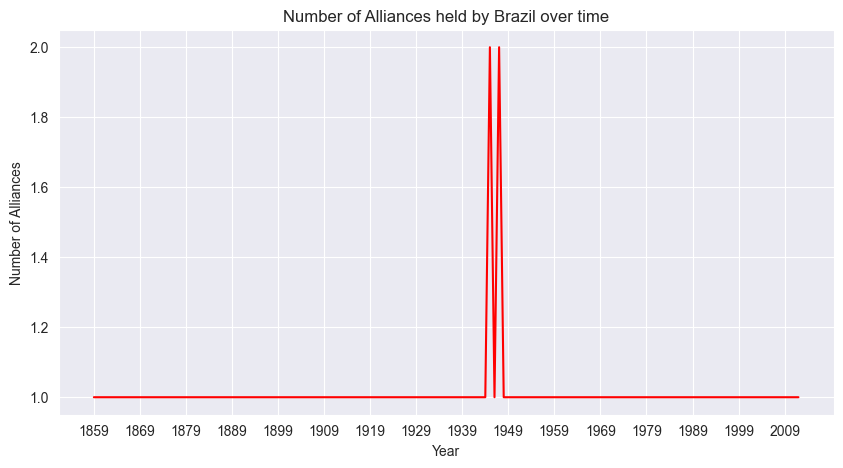

Stats for amount of states in dataset each year
Mean: 1.0198019801980198
Median: 1.0
Mode: 1


In [90]:
# Alliances per year for a single state
alliances_year_count = {}
state_name = 'Brazil'
for year in range(1816,2013):
    alliance_year = ally_dyad_year[ally_dyad_year['year'] == year]
    alliances_year_count[year] = (alliance_year[alliance_year['state_name1']==state_name])['version4id'].nunique()

alliances_year_count_df = pd.DataFrame.from_dict(alliances_year_count,orient='index',columns=['count'])

alliances_year_count_df = alliances_year_count_df.loc[alliances_year_count_df['count'] != 0]

# Plotting the states by their first occurrence date
plt.figure(figsize=(10, 5))
plt.plot(alliances_year_count_df.index, alliances_year_count_df['count'], color='red')
plt.xlabel('Year')
plt.ylabel('Number of Alliances')
plt.title('Number of Alliances held by {} over time'.format(state_name))
plt.xticks(range(alliances_year_count_df.index.min(),alliances_year_count_df.index.max(),10))
plt.show()

print("Stats for amount of states in dataset each year\nMean: {}\nMedian: {}\nMode: {}".format(alliances_year_count_df['count'].mean(),alliances_year_count_df['count'].median(),alliances_year_count_df['count'].mode().values[0]))

In [91]:
ally_dyad_year[ally_dyad_year['state_name1'] == 'Brazil']

,version4id,ccode1,state_name1,ccode2,state_name2,dyad_st_day,dyad_st_month,dyad_st_year,dyad_end_day,dyad_end_month,dyad_end_year,left_censor,right_censor,defense,neutrality,nonaggression,entente,year,version
2640,37,140,Brazil,160,Argentina,2,1,1859,14.0,9.0,1864,0,0,1,1,0.0,0.0,1859,4.1
2641,37,140,Brazil,160,Argentina,2,1,1859,14.0,9.0,1864,0,0,1,1,0.0,0.0,1860,4.1
2642,37,140,Brazil,160,Argentina,2,1,1859,14.0,9.0,1864,0,0,1,1,0.0,0.0,1861,4.1
2643,37,140,Brazil,160,Argentina,2,1,1859,14.0,9.0,1864,0,0,1,1,0.0,0.0,1862,4.1
2644,37,140,Brazil,160,Argentina,2,1,1859,14.0,9.0,1864,0,0,1,1,0.0,0.0,1863,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41939,210,140,Brazil,165,Uruguay,2,9,1947,NaN,NaN,2012,0,1,1,0,1.0,1.0,2008,4.1
41940,210,140,Brazil,165,Uruguay,2,9,1947,NaN,NaN,2012,0,1,1,0,1.0,1.0,2009,4.1
41941,210,140,Brazil,165,Uruguay,2,9,1947,NaN,NaN,2012,0,1,1,0,1.0,1.0,2010,4.1
41942,210,140,Brazil,165,Uruguay,2,9,1947,NaN,NaN,2012,0,1,1,0,1.0,1.0,2011,4.1
